# Flight Fare Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Dataset for Flight Prediction

In [2]:
flight_train_df = pd.read_excel("D:\\Data Science\\Internship\\Flight Fare Prediction\\Data_Train.xlsx")

In [3]:
flight_train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_train_df.shape

(10683, 11)

In [5]:
flight_train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
flight_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
flight_train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
flight_train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
flight_train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- In above shows only Route and Total_Stops have 1 null value, so we can drop it

In [10]:
flight_train_df.dropna(inplace=True)

In [11]:
flight_train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Visualization

- Plotting Price vs Airline 

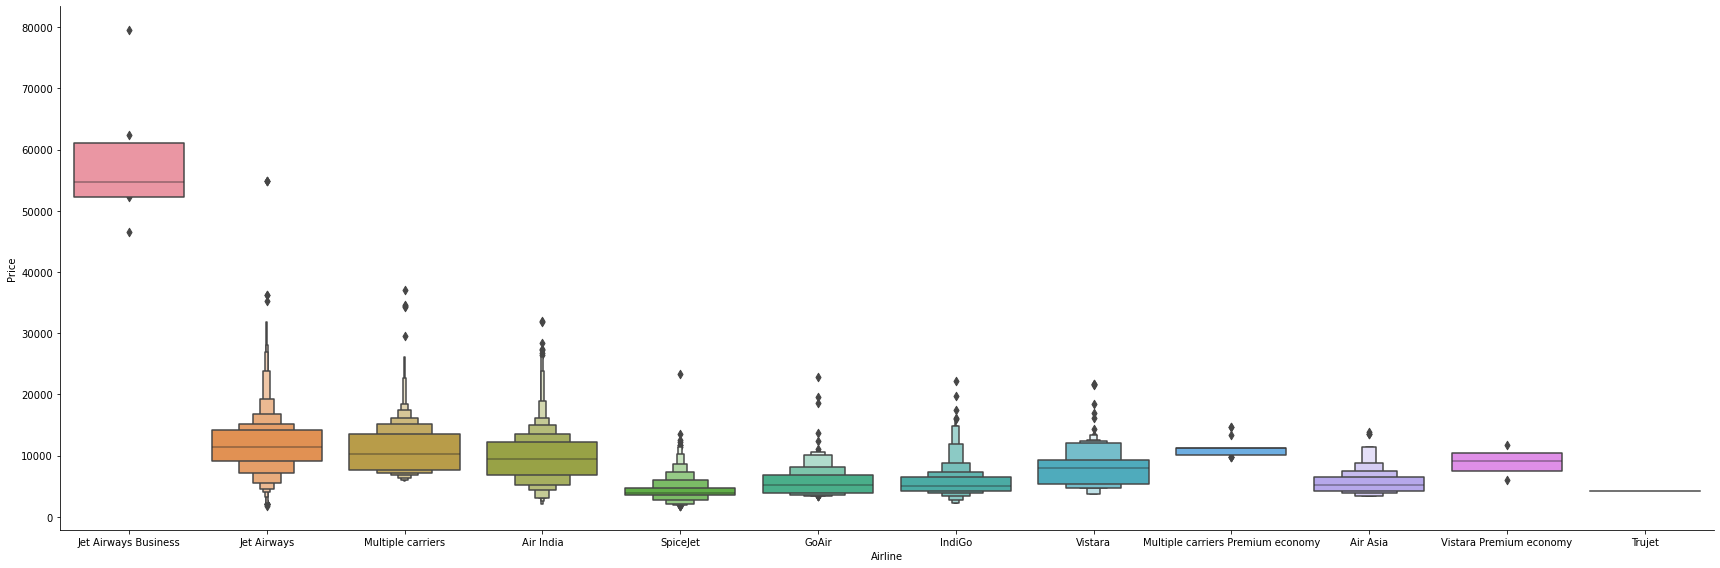

In [12]:
sns.catplot(x='Airline', y='Price', data=flight_train_df.sort_values("Price", ascending=False), kind='boxen', height=8, aspect=3)
plt.show()

- In above plot the boxplot between the price of the flight and airline and we can conclude that **Jet Airways has the most outliers in terms of price.**

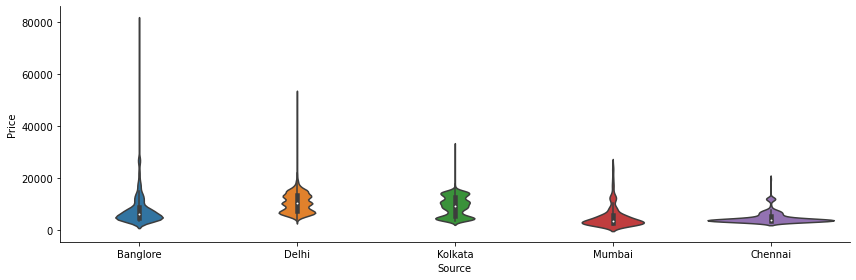

In [13]:
# Plotting Violin plot for Price vs Source
sns.catplot(x= 'Source', y='Price', data= flight_train_df.sort_values("Price", ascending=False), kind='violin', height=4, aspect=3)
plt.show()

- In above plotting a box plot between the price of the flight and the source places i.e. the place from where passengers will travel to the destination and we can see that **Banglore as the source location has the most outliers** while **Chennai has the least.**

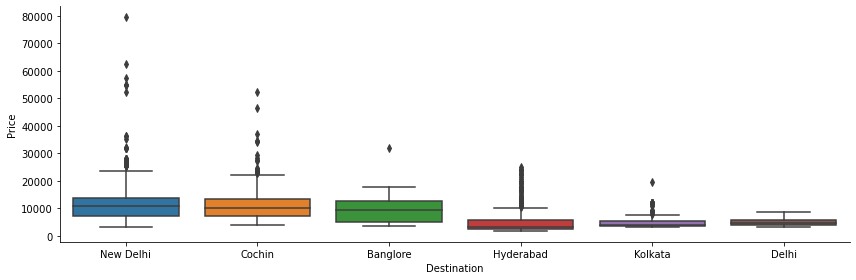

In [14]:
# Plotting Box plot for Price vs Destination
sns.catplot(x='Destination', y='Price', data=flight_train_df.sort_values("Price", ascending=False), kind='box', height=4, aspect=3)
plt.show()

- In above plotting the box plot between the price of the flight and the destination to which the passenger is travelling and we can conclude that **New Delhi has the most outliers and Kolkata has the least.**

In [15]:
flight_train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

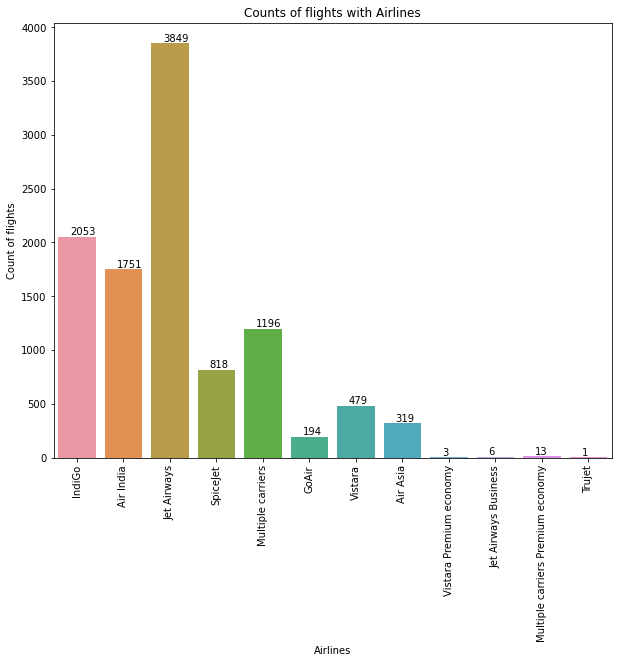

In [16]:
# Plotting Count of flights with airlines
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Airline', data= flight_train_df)
plt.title('Counts of flights with Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count of flights')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

- Jet Airways Business, Vistara Premium economy and Trujet have almost negligible flights.

## Exploratory Data Aalysis(EDA) / Feature Engineering

- From data description we can see that Date_of_Journey is a object data type, Therefore, we have to convert this datatype into timestamp, so as to use this column properly for prediction.

In [17]:
# Extracting day and month from Date of Journey and formatting in (D/M/Y) format, after that appending in train_data
flight_train_df['Journey_day'] = pd.to_datetime(flight_train_df.Date_of_Journey, format='%d/%m/%Y').dt.day
flight_train_df['Journey_month'] = pd.to_datetime(flight_train_df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [18]:
flight_train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [19]:
# We extracted day and month from Date_of_journey, so we can drop this column.
flight_train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [20]:
# Now extract minute and hour from the Dep_Time column

# Extract Hours from Dep_Time
flight_train_df['Dep_hour'] = pd.to_datetime(flight_train_df['Dep_Time']).dt.hour

# Extract Minutes from Dep_Time
flight_train_df['Dep_Mins'] = pd.to_datetime(flight_train_df['Dep_Time']).dt.minute

# Now no use of Dep_Time column, so we can drop/remove this column
flight_train_df.drop(['Dep_Time'], axis=1, inplace=True)

flight_train_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [21]:
# Similarly extract minute and hour from the Arrival_Time column

# Extract hours from Arrival_Time
flight_train_df['Arr_hour'] = pd.to_datetime(flight_train_df['Arrival_Time']).dt.hour

# Extract minutes from Arrival_Time
flight_train_df['Arr_mins'] = pd.to_datetime(flight_train_df['Arrival_Time']).dt.minute

# No use of Arrival_Time column, so we can drop this column
flight_train_df.drop(['Arrival_Time'], axis=1, inplace=True)

flight_train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Mins,Arr_hour,Arr_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [22]:
# Now converting Duration column into 
# First convert and asssign Duration column into a list
duration = list(flight_train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:         # Check duration contain only hour or mins 
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 min 
        else:
            duration[i] = '0h ' + duration[i]          # Adds 0 hour

# Extract hours and mins from duration
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))              # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))   # Extract minutes from duration

# Adding duration_hours and duration_mins column to flight_train_df
flight_train_df['duration_hours'] = duration_hours
flight_train_df['duration_mins'] = duration_mins

# No use of Duration column, so we can drop it.
flight_train_df.drop(['Duration'], axis=1, inplace=True)

flight_train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Mins,Arr_hour,Arr_mins,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Catagorical Data Handling 

- We have these catagorical data columns :- Airline, Source, Destination and Total_Stops

- We can handle these data by using two methods **1) Nominal Data : One Hot Encoding  2) Ordinal Data: Label Enconding**

In [23]:
# For Airline column 
flight_train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [24]:
# Airline column is looks Nominal Data catagory, so here we can use One Hot Encoding

Airline = flight_train_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
# For Source Column 
flight_train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [26]:
# Source column is looks Nominal Data catagory, so here we can use One Hot Encoding
Source = flight_train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
# For Destination column
flight_train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [28]:
# Destination column is looks Nominal Data catagory, so here we can use One Hot Encoding
Destination = flight_train_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [29]:
# Looking Route column
flight_train_df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [30]:
flight_train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
# In Additional_Info coulmn have almost 80% have No info, we can drop this column
# Also drop Route column 

flight_train_df.drop(['Route', 'Additional_Info'], axis= 1, inplace=True)

In [32]:
# For Total_Stops column 

flight_train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
# Total_Stops column is looks Ordinal Data catagory, so here we can use Label Encoding.

flight_train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace= True)

flight_train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Mins,Arr_hour,Arr_mins,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [34]:
# Now Concatenate above encoded dataframe --> flight_train_df + Airline + Source + Destination

train_df = pd.concat([flight_train_df, Airline, Source, Destination], axis=1)

train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Mins,Arr_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Now No use of existing catagorical data, so we can drop these column

train_df.drop(['Airline', 'Source','Destination'], axis=1, inplace= True)
train_df.head() 

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Mins,Arr_hour,Arr_mins,duration_hours,duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


# Test Set 

In [36]:
flight_test_df = pd.read_excel('D:\\Data Science\\Internship\\Flight Fare Prediction\\Test_set.xlsx')

In [37]:
flight_test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### We are going to process test dataset, Similarly we does in Train Dataset

In [38]:
flight_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [39]:
# Checking Null values
flight_test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [40]:
# Exloratory Data Analysis(EDA) of test dataset

# Extract day and month from Date_of_Journey
flight_test_df['Journey_day'] = pd.to_datetime(flight_test_df.Date_of_Journey, format= "%d/%m/%Y").dt.day
flight_test_df['Journey_month'] = pd.to_datetime(flight_test_df.Date_of_Journey, format= "%d/%m/%Y").dt.month
flight_test_df.drop(["Date_of_Journey"], axis=1, inplace=True)

# Extract hour and mins from Dep_Time
flight_test_df['Dep_hour'] = pd.to_datetime(flight_test_df.Dep_Time).dt.hour
flight_test_df['Dep_mins'] = pd.to_datetime(flight_test_df.Dep_Time).dt.minute
flight_test_df.drop(['Dep_Time'], axis= 1, inplace=True)

# Extract hour and mins from Arrival_Time 
flight_test_df['Arr_hour'] = pd.to_datetime(flight_test_df.Arrival_Time).dt.hour
flight_test_df['Arr_mins'] = pd.to_datetime(flight_test_df.Arrival_Time).dt.minute
flight_test_df.drop(['Arrival_Time'], axis= 1, inplace= True)

# Extract hour and mins from Duration
duration = list(flight_test_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:      # Check duration contain only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 min
        else:
            duration[i] = "0h " + duration[i]

# Extract hours and mins from duration
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))              # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))   # Extract minutes from duration

# Adding duration_hours and duration_mins column to flight_test_df
flight_test_df['duration_hours'] = duration_hours
flight_test_df['duration_mins'] = duration_mins

# No use of Duration column, so we can drop it.
flight_test_df.drop(['Duration'], axis=1, inplace=True)

flight_test_df.head()        

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


## Feature Engineering/ Catagorical Data

In [41]:
print('Airline')
print("===========================================================")
print(flight_test_df['Airline'].value_counts())
Airline = pd.get_dummies(flight_test_df['Airline'], drop_first=True)

print()

print('Source')
print("=============================================================")
print(flight_test_df['Source'].value_counts())
Source = pd.get_dummies(flight_test_df['Source'], drop_first=True)

print()

print('Destination')
print("==============================================================")
print(flight_test_df['Destination'].value_counts())
Destination = pd.get_dummies(flight_test_df['Destination'], drop_first=True)

print()

# In Additional_Info coulmn have almost 80% have No info, we can drop this column
# Also drop Route column 

flight_test_df.drop(['Route', 'Additional_Info'], axis= 1, inplace=True)

# Total_Stops column is looks Ordinal Data catagory, so here we can use Label Encoding.

flight_test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace= True)

# Now Concatenate above encoded dataframe --> flight_train_df + Airline + Source + Destination

test_df = pd.concat([flight_test_df, Airline, Source, Destination], axis=1)

# Now No use of existing catagorical data, so we can drop these column

test_df.drop(['Airline', 'Source','Destination'], axis=1, inplace= True)

print()

print('Shape of test data: ', test_df.shape)

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of test data:  (2671, 28)


In [42]:
test_df.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_day                        2671 non-null   int64
 2   Journey_month                      2671 non-null   int64
 3   Dep_hour                           2671 non-null   int64
 4   Dep_mins                           2671 non-null   int64
 5   Arr_hour                           2671 non-null   int64
 6   Arr_mins                           2671 non-null   int64
 7   duration_hours                     2671 non-null   int64
 8   duration_mins                      2671 non-null   int64
 9   Air India                          2671 non-null   uint8
 10  GoAir                              2671 non-null   uint8
 11  IndiGo                             2671 non-null   uint8
 12  Jet Airways         

### Feature Selection

We finding out the best feature have good relation with the target variable. 

In [44]:
train_df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_Mins', 'Arr_hour', 'Arr_mins', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [45]:
X = train_df.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_Mins', 'Arr_hour', 'Arr_mins', 'duration_hours', 'duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()      

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Mins,Arr_hour,Arr_mins,duration_hours,duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y = train_df.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

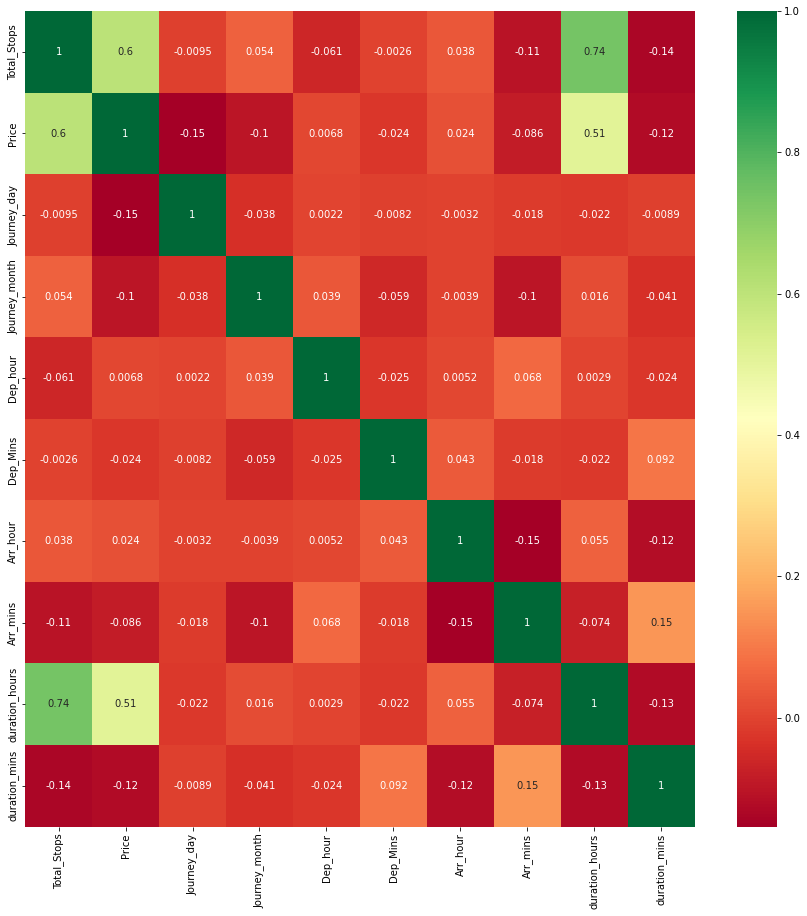

In [47]:
# Finding correlation

plt.figure(figsize = (15,15))
sns.heatmap(flight_train_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [48]:
# Finding important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [49]:
print(selection.feature_importances_)

[2.21644292e-01 1.44181299e-01 5.28397415e-02 2.43697223e-02
 2.19614410e-02 2.81661023e-02 1.89475949e-02 1.36542120e-01
 1.72745346e-02 8.94341408e-03 1.59740302e-03 1.67707452e-02
 1.38371552e-01 6.76622601e-02 2.00020893e-02 8.29446921e-04
 3.15517968e-03 1.03586086e-04 4.99147152e-03 8.49325250e-05
 3.94885460e-04 6.71012685e-03 3.40854252e-03 5.65740884e-03
 1.17870570e-02 1.10342444e-02 7.23962785e-03 5.06060827e-04
 2.48231178e-02]


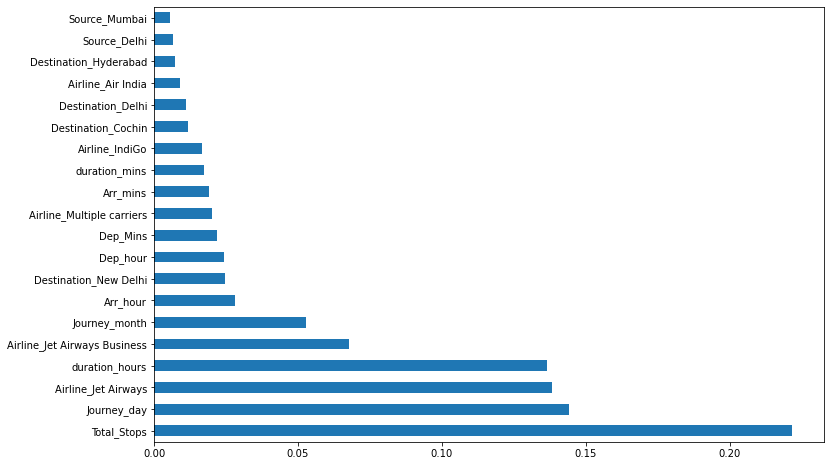

In [50]:
# Plotting the important features

plt.figure(figsize=(12,8))
fea_importances = pd.Series(selection.feature_importances_, index= X.columns)
fea_importances.nlargest(20).plot(kind='barh')
plt.show()

## Machine Learning Model
#### Fitting Model using Randam Forest 

In [51]:
# Split dataset into train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
rf_reg.score(X_train, y_train)

0.9539225090559764

In [54]:
rf_reg.score(X_test, y_test)

0.7956906599469592

In [55]:
y_pred = rf_reg.predict(X_test)

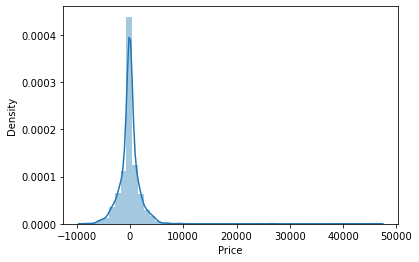

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

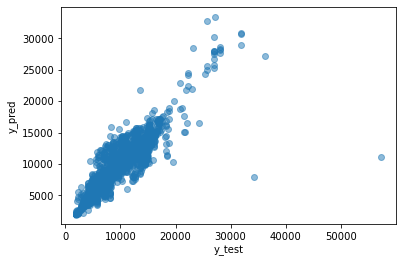

In [57]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1178.7948259568125
MSE: 4405329.497775989
RMSE: 2098.88768107681


In [67]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [69]:
r2_score(y_test, y_pred)

0.7956906599469592

### Hyperparameter Tuning 

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
# We are doing hyperparameter tuning using Randamized SearchCV

# Number of trees in Random Forest 
n_estimators = [int(x) for x in np.linspace(start= 100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in the tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [72]:
# Create Random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [73]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator= rf_reg, 
                                param_distributions=random_grid, 
                                scoring='neg_mean_squared_error',
                                n_iter=10, cv=5, verbose=2, 
                                random_state=42,n_jobs=1)

In [74]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  17.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [76]:
prediction = rf_random.predict(X_test)

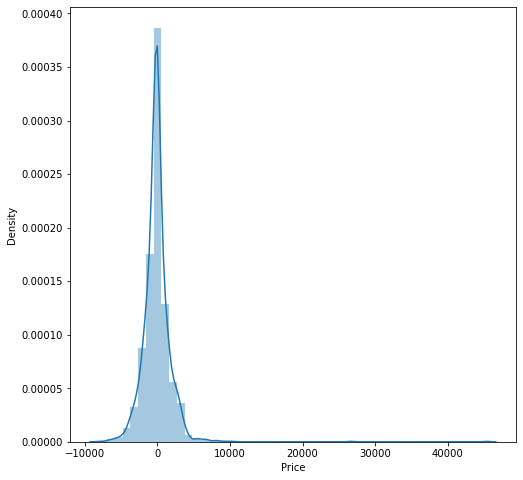

In [77]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

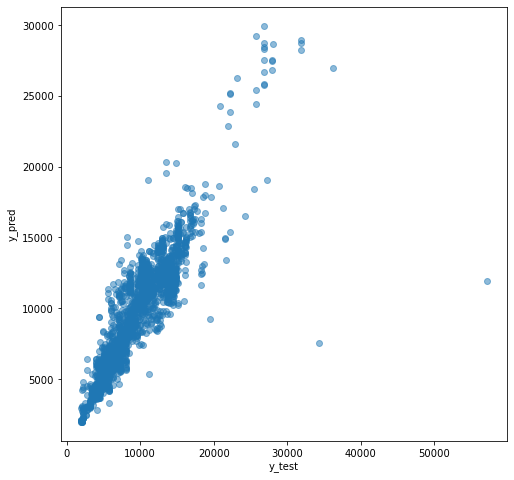

In [78]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [80]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 1163.3535530642541
MSE: 4048436.0488560773
RMSE: 2012.0725754445532


### Save the model to reuse it again

In [81]:
import pickle

file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_reg, file)

In [87]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [88]:
y_prediction = forest.predict(X_test)

In [90]:
r2_score(y_test, y_prediction)

0.7956906599469592

In [91]:
!pip freeze > requirements.txt